In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from os.path import join, expanduser, basename
from invert import invert_sd, epsilon_density
import os
import geopandas as gpd
import rasterio as rio
from shapely.geometry import box
import matplotlib as mpl


In [2]:
with open(expanduser('~/scratch/data/uavsar/image_fps'), 'rb') as f:
    image_fps = pickle.load(f)
locs = []
times = []
for i in image_fps:
    if basename(i['fp']).split('_')[-2][-2:] == 'HH':
        locs.append(i['location'])
        df = pd.read_csv(i['ann'], index_col=0)
        times.append({'start':df.loc['value','start time of acquisition for pass 1'], 'stop':df.loc['value','start time of acquisition for pass 2'], 'loc':i['location']})
print(pd.value_counts(locs))
print(len(locs))

Salt Lake City, UT                18
Fraser, CO                        15
Lowman, CO                        14
Grand Mesa, CO                    13
Rocky Mountains NP, CO            10
Ironton, CO                        7
Eldorado National Forest, CA       4
Donner Memorial State Park, CA     4
Sierra National Forest, CA         3
Los Alamos, NM                     3
Utica, MT                          2
Peeler Peak, CO                    2
Silver City, ID                    1
dtype: int64
96


In [3]:
loc_dic = {}
color = ['red','black','green', 'blue','orange','purple','pink','teal','violet','brown','indigo','grey']
color = ['pink','red','orange','yellow','green','aquamarine','teal','blue','purple','violet','grey','black','brown']
for i, loc in enumerate(np.unique(locs)):
    loc_dic[loc] = i
    loc_dic[loc+'_color'] = color[i]

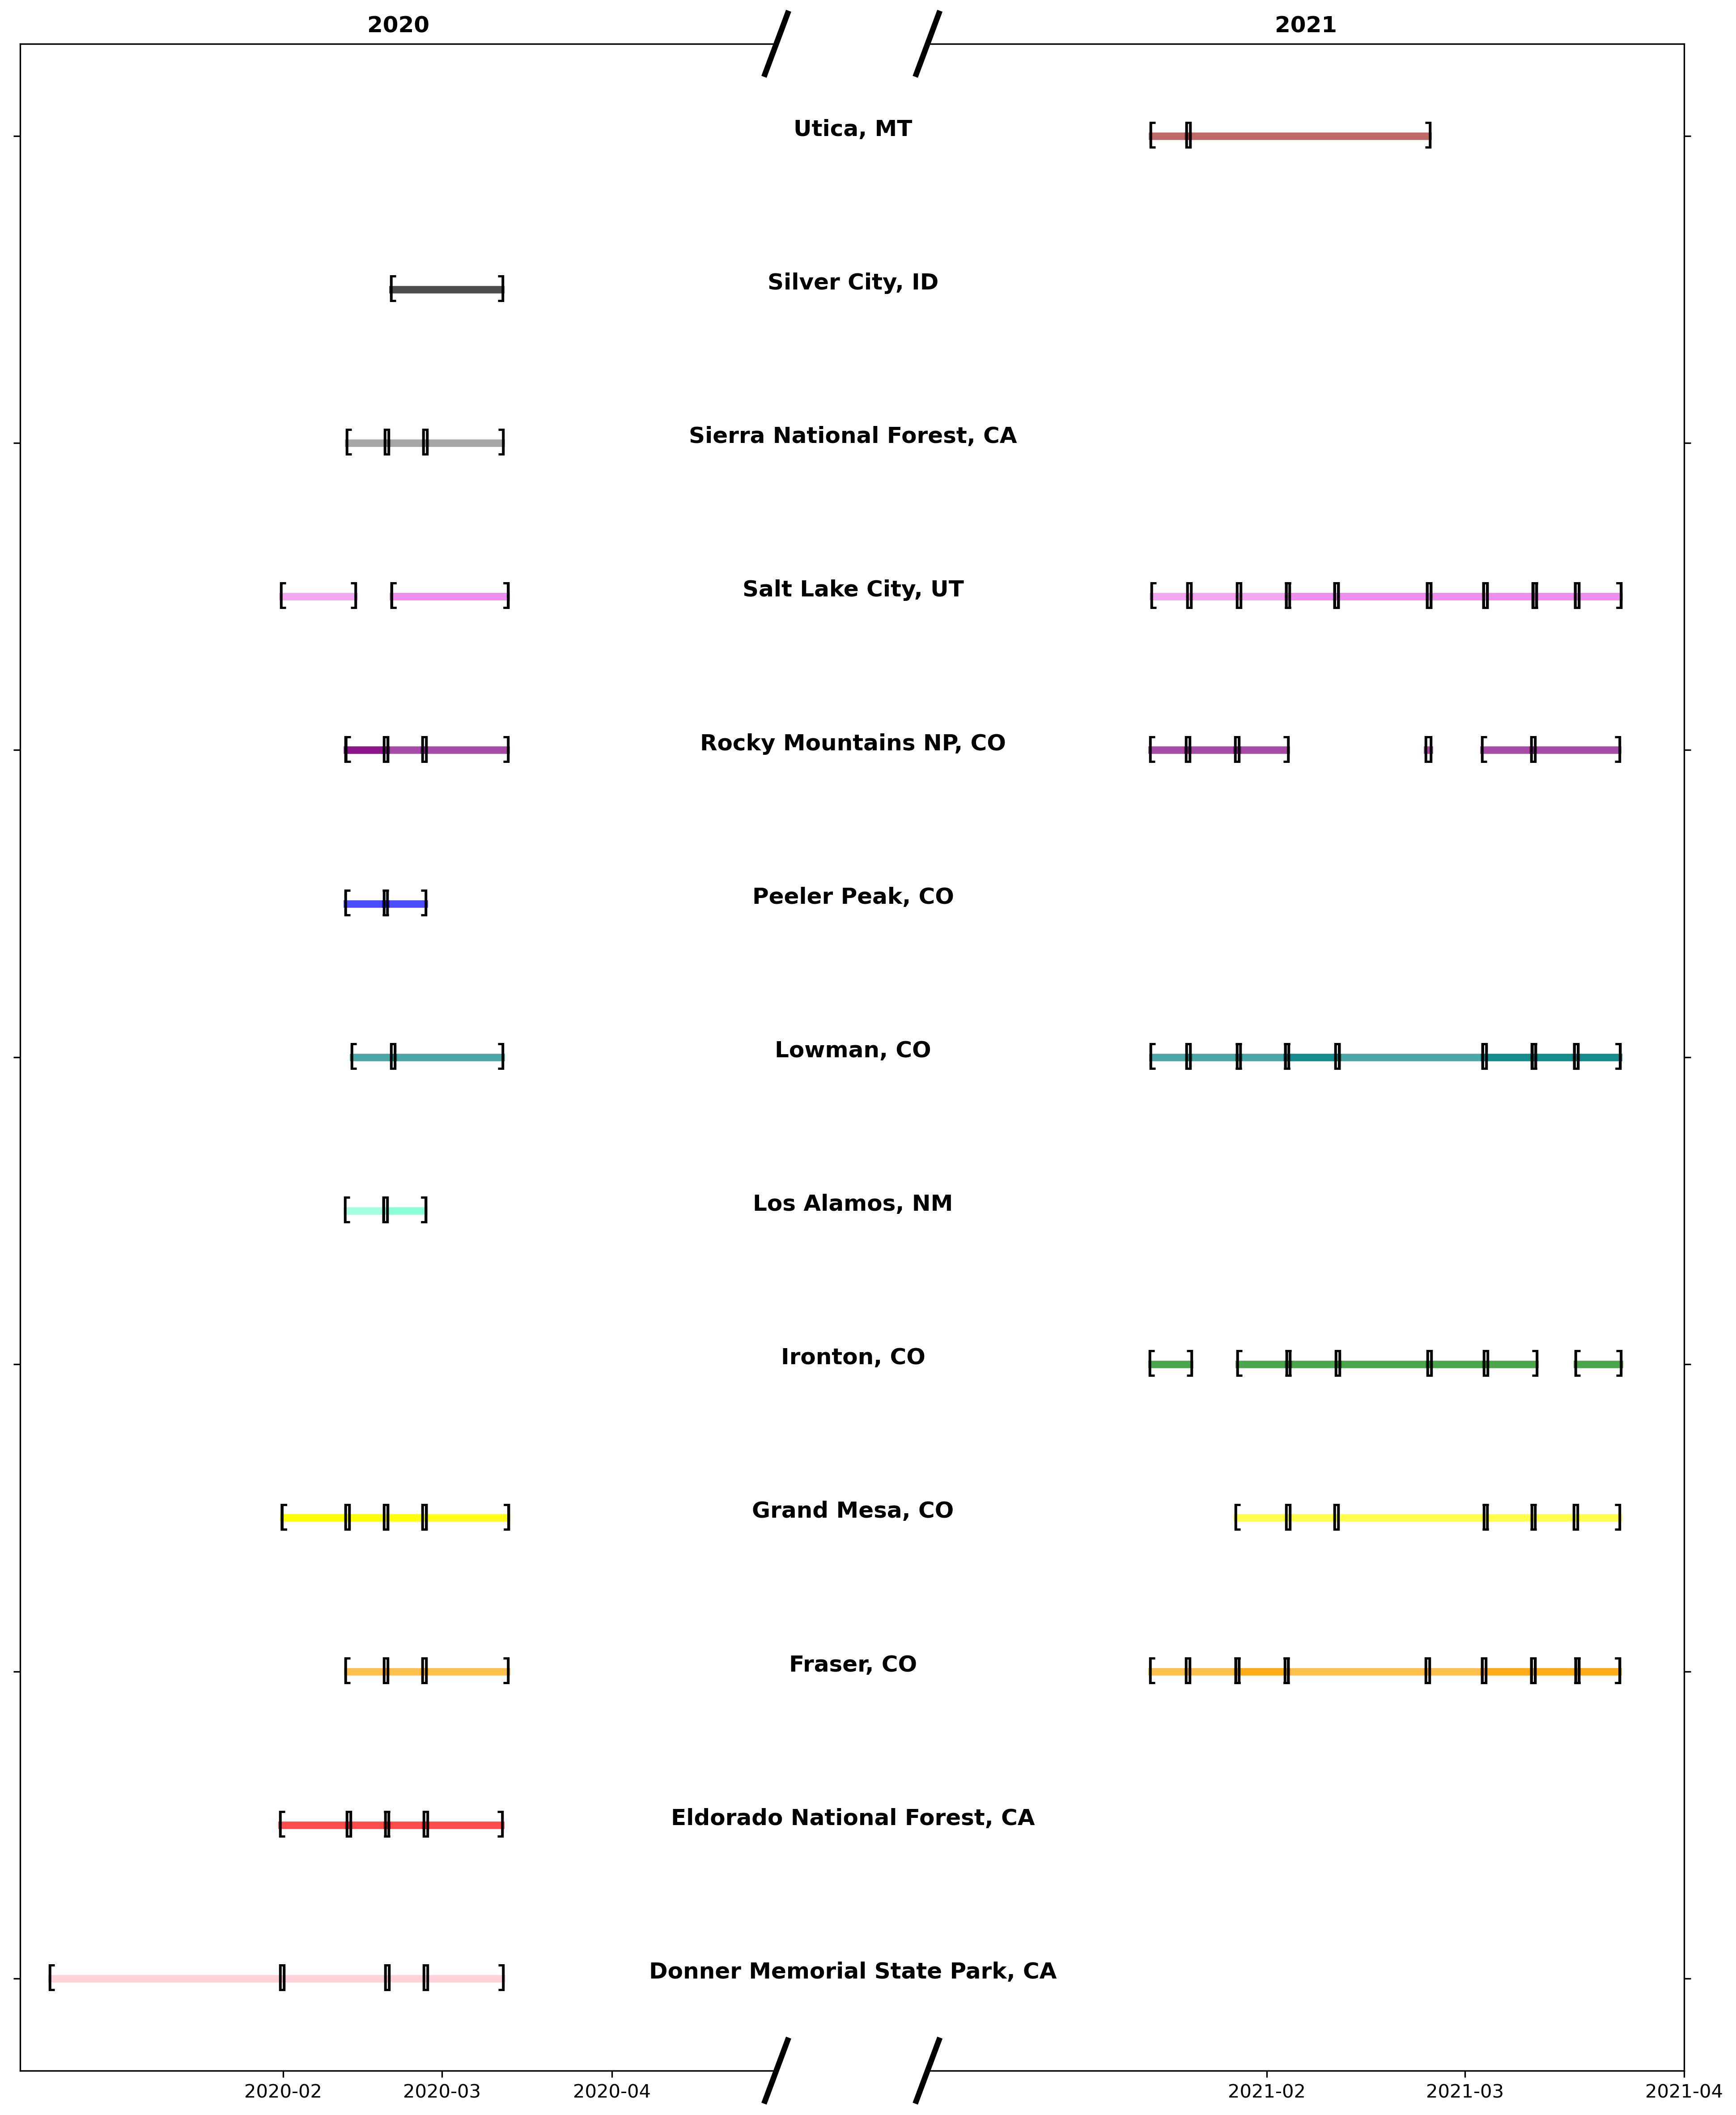

In [4]:
f,axes = plt.subplots(1,2,sharey=True, facecolor='w', figsize = (16,20), dpi = 300)
for i, ax in enumerate(axes):
    ax.set_title(2020+i, weight='bold')
    locs = []
    for t in times:
        xdata = [pd.to_datetime(t['start']),pd.to_datetime(t['stop'])]
        loc = t['loc']
        ydata = [loc_dic[loc],loc_dic[loc]]
        # ydata = [y+np.random.random()/20 for y in ydata]
        # add_interval(ax, [t['start'],t['stop']], [loc_dic[t['loc']],loc_dic[t['loc']]], "[]")
        if loc not in locs:
            # ax.plot(xdata,ydata, color = loc_dic[loc+'_color'], label = loc)
            if i == 0:
                # ax.annotate('figure pixels', xy=(0.5, 0.5), xycoords='figure fraction', weight = 'bold', ha='center')
                ax.annotate(loc, (pd.to_datetime('2020-05-15'), ydata[0]), weight = 'bold', ha='center', annotation_clip=False, fontsize = 12)
                ax.set_zorder(1)
            locs.append(loc)

        ax.plot(xdata,ydata, color = loc_dic[loc+'_color'], linewidth = 4, alpha = 0.7)

        anno_args = {
            'ha': 'center',
            'va': 'center',
            'size': 16,
            'color': 'black'
        }
        a0 = ax.annotate('[', xy=(xdata[0], ydata[0]), **anno_args)
        a1 = ax.annotate(']', xy=(xdata[1], ydata[1]), **anno_args)

    # n = 25  # Keeps every 7th label
    # [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

    # import matplotlib.ticker as plticker
    # loc = plticker.MultipleLocator(base=25) # this locator puts ticks at regular intervals
    # ax.xaxis.set_major_locator(loc)

    from matplotlib.dates import MonthLocator
    ax.xaxis.set_major_locator(MonthLocator([2,3,4]))

    ax.axes.yaxis.set_ticklabels([])


ax = axes[0]
ax2 = axes[1]
ax.set_xlim(pd.to_datetime('2019-12-15'),pd.to_datetime('2020-05-01'))
ax2.set_xlim(pd.to_datetime('2020-12-15'),pd.to_datetime('2021-04-01'))

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, linewidth = 3)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

In [3]:
with open(expanduser(f'~/uavsar/results/uavsar_snotel_sd/res_df'), 'rb') as f:
    res = pickle.load(f)
res_vv = res[res.pol == 'VV']

sites_gdf_conus = gpd.read_file('~/scratch/data/uavsar/snotel/ulmo_sites.json')

In [9]:
sites_used = gpd.GeoDataFrame()
for stat in np.unique(stats):
    sites_used = sites_used.append(sites_gdf_conus[sites_gdf_conus.code == stat])
    # print(sites_gdf_conus[sites_gdf_conus.code == stat])

/tmp/ipykernel_20750/2904974081.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sites_used = sites_used.append(sites_gdf_conus[sites_gdf_conus.code == stat])
/tmp/ipykernel_20750/2904974081.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sites_used = sites_used.append(sites_gdf_conus[sites_gdf_conus.code == stat])
/tmp/ipykernel_20750/2904974081.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sites_used = sites_used.append(sites_gdf_conus[sites_gdf_conus.code == stat])
/tmp/ipykernel_20750/2904974081.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sites_used = sites_used.append(sites_gdf_conus[sites_gdf_conus.code == sta

In [10]:
sites_used

,index,code,name,network,elevation_m,site_property,geometry
489,SNOTEL:1014_CO_SNTL,1014_CO_SNTL,Middle Fork Camp,SNOTEL,2724.912109,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-106.02730 39.79560)
613,SNOTEL:1032_CO_SNTL,1032_CO_SNTL,Rawah,SNOTEL,2749.295898,"{'county': 'Jackson', 'state': 'Colorado', 'si...",POINT (-106.00760 40.70750)
126,SNOTEL:1067_CA_SNTL,1067_CA_SNTL,Carson Pass,SNOTEL,2548.127930,"{'county': 'Alpine', 'state': 'California', 's...",POINT (-120.00220 38.69270)
438,SNOTEL:1123_CO_SNTL,1123_CO_SNTL,Long Draw Resv,SNOTEL,3041.904053,"{'county': 'Larimer', 'state': 'Colorado', 'si...",POINT (-105.76560 40.51230)
290,SNOTEL:1173_NM_SNTL,1173_NM_SNTL,Garita Peak,SNOTEL,3096.768066,"{'county': 'Rio Arriba', 'state': 'New Mexico'...",POINT (-106.54838 36.00500)
273,SNOTEL:1186_CO_SNTL,1186_CO_SNTL,Fool Creek,SNOTEL,3398.520020,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-105.86750 39.86870)
341,SNOTEL:1187_CO_SNTL,1187_CO_SNTL,High Lonesome,SNOTEL,3236.976074,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-105.75471 40.03592)
655,SNOTEL:1251_CO_SNTL,1251_CO_SNTL,Sawtooth,SNOTEL,2932.176025,"{'county': 'Boulder', 'state': 'Colorado', 'si...",POINT (-105.58625 40.13697)
622,SNOTEL:2029_ID_SNTL,2029_ID_SNTL,Reynolds Creek,SNOTEL,1706.880005,"{'county': 'Owyhee', 'state': 'Idaho', 'site_c...",POINT (-116.84310 43.28863)
18,SNOTEL:312_ID_SNTL,312_ID_SNTL,Banner Summit,SNOTEL,2145.791992,"{'county': 'Boise', 'state': 'Idaho', 'site_co...",POINT (-115.23447 44.30342)


In [11]:
#geojson of state polygons
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

In [34]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

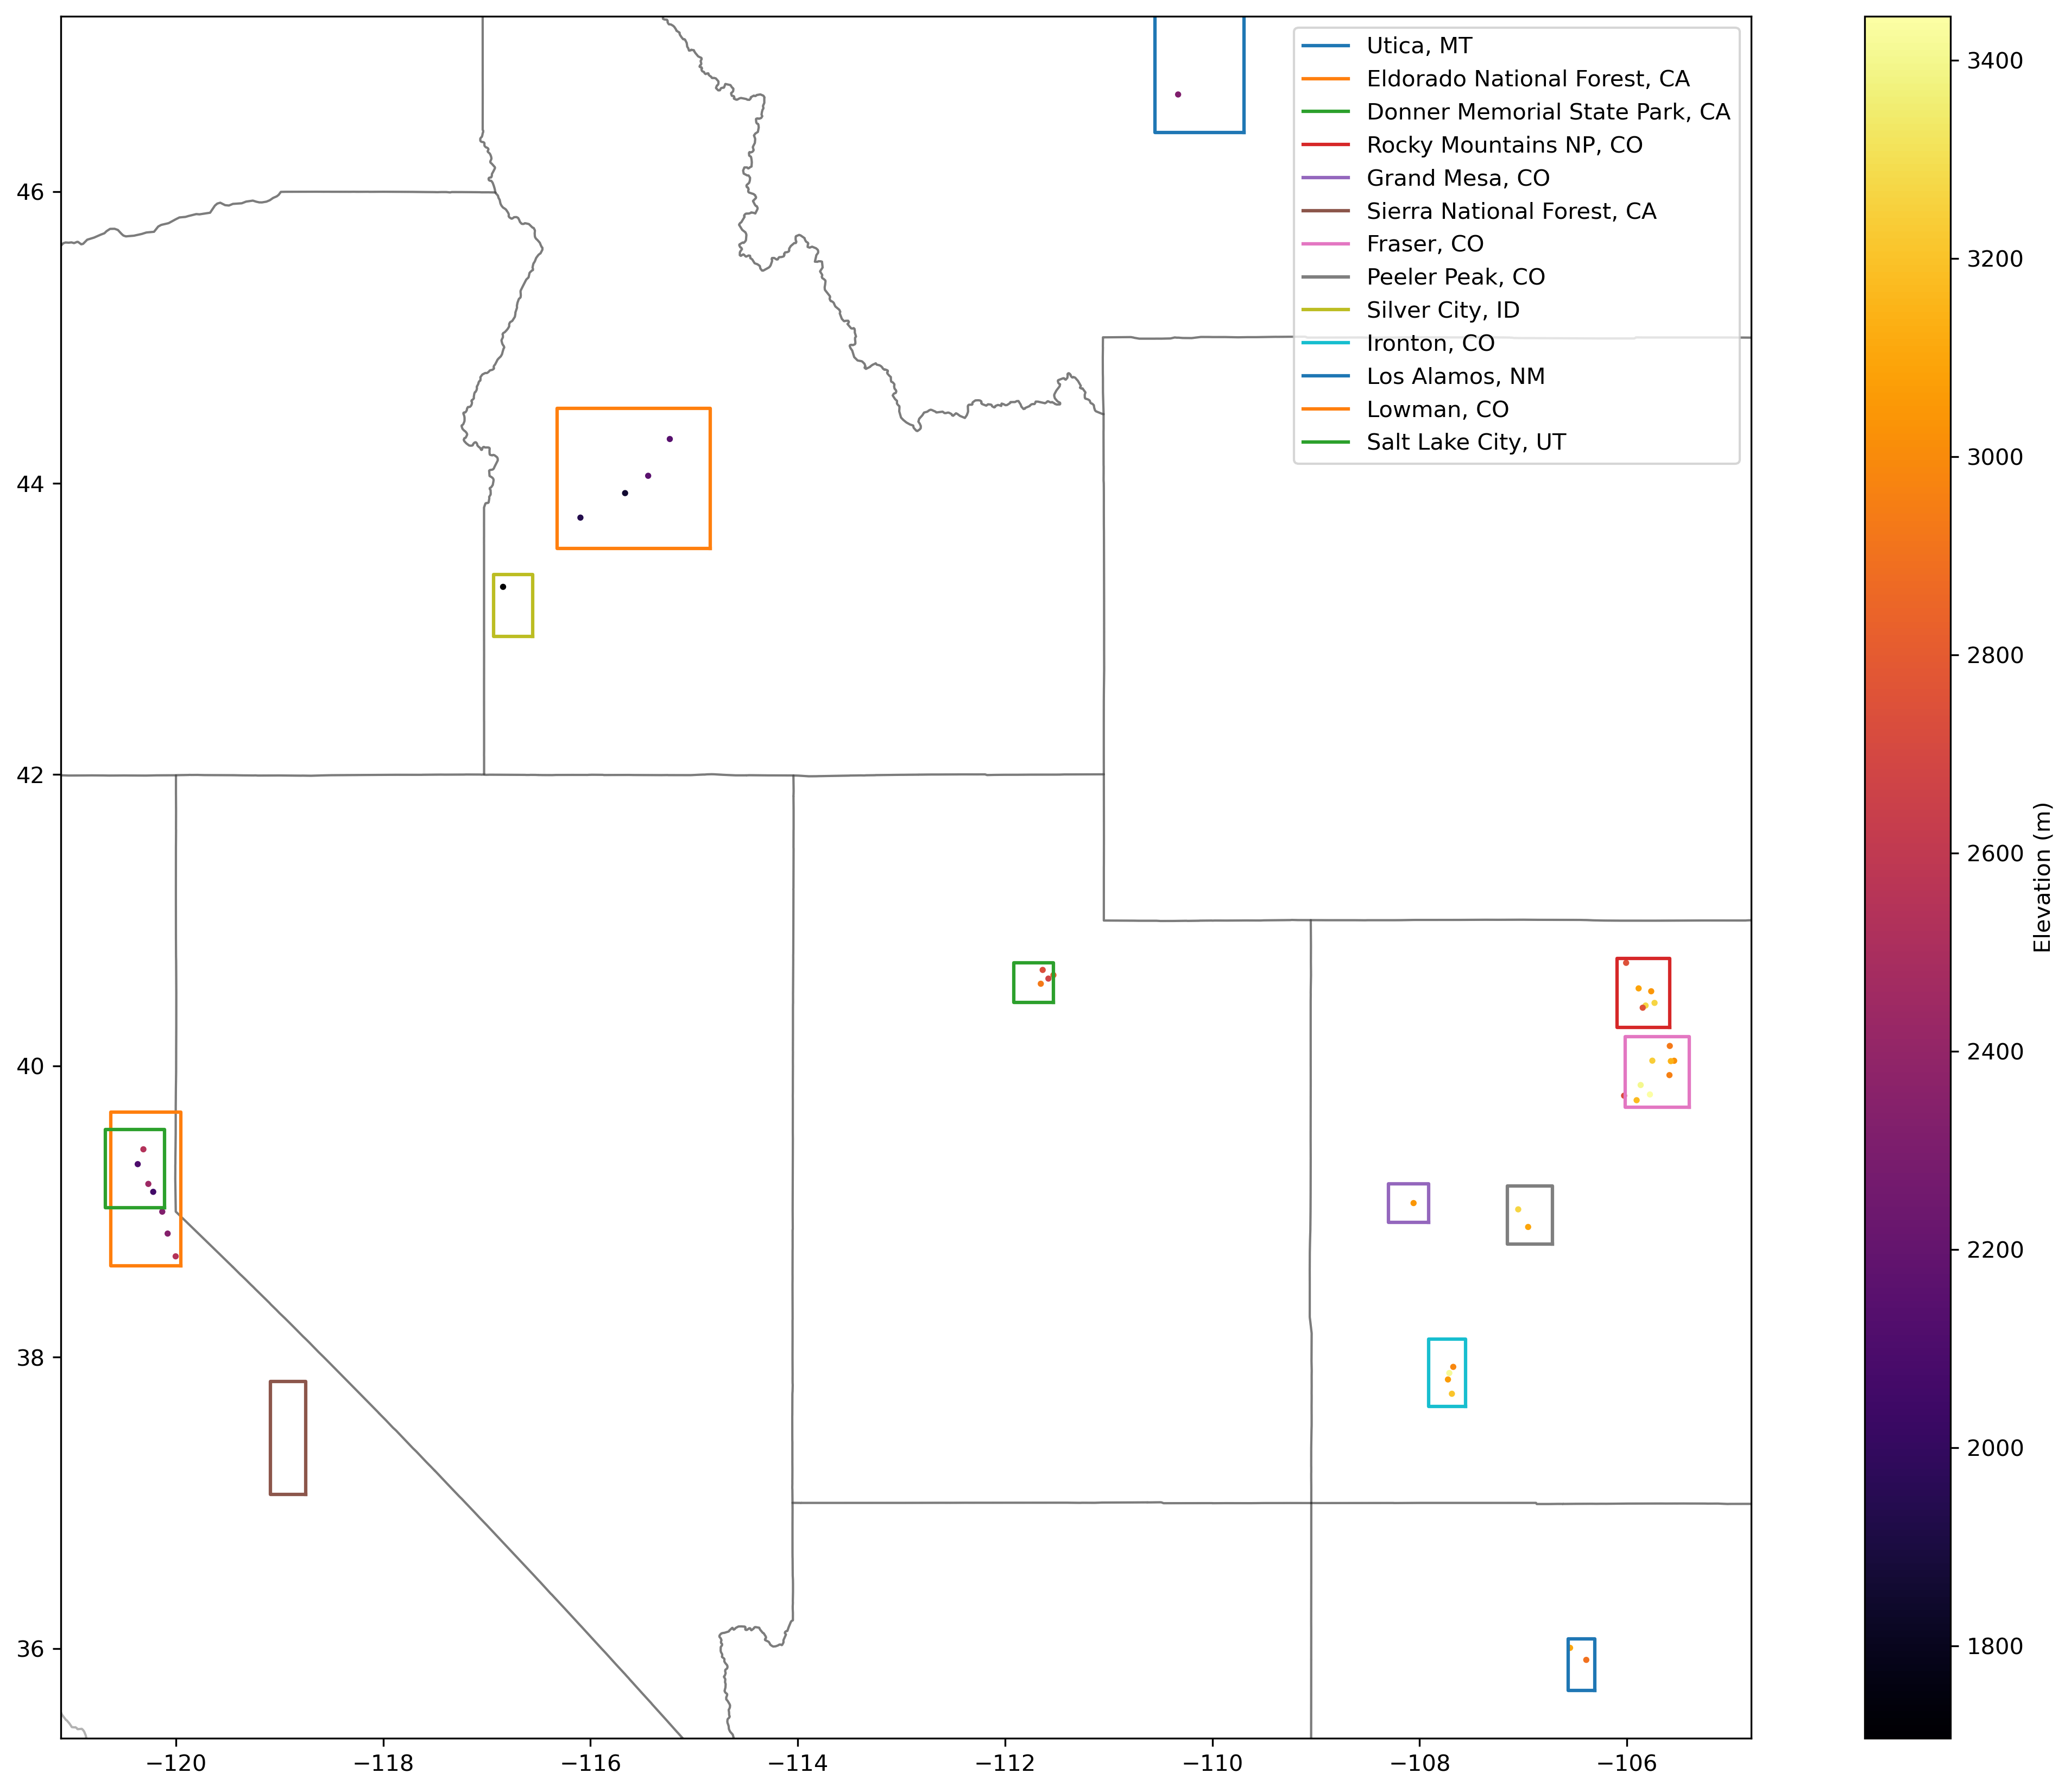

In [38]:
f, ax = plt.subplots(figsize = (18,14), dpi = 300)
sites_used.plot(ax=ax, column='elevation_m', markersize=3, cmap='inferno', legend=True, legend_kwds={'label': "Elevation (m)"})
ax.autoscale(False)
states_gdf.plot(ax=ax, facecolor='none', edgecolor='k', alpha=0.3);

locs = []
for i in image_fps:
    loc = i['location']
    if loc not in locs:
        locs.append(loc)
        with rio.open(i['fp']) as src:
            bounds = src.bounds
        geom = box(*bounds)
        x,y = geom.exterior.xy
        ax.plot(x,y, label = loc)
plt.legend(loc = 'upper right')